# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Stakeholders for this project are the HR department, management team, and company executives who are interested in understanding employee turnover and identifying factors contributing to attrition.


2. The overarching goal is to analyze employee turnover, pinpoint key factors influencing attrition, and enable the implementation of proactive measures for employee retention and enhanced workforce management.


3. Inital observations from the data exploration:

   * __Diverse Employee Attributes:__ The dataset provides insights into various employee attributes, including satisfaction level, last evaluation, number of projects, average monthly hours, and tenure.
   * __Imbalance in 'Left' Variable:__ A noticeable imbalance exists in the target variable 'left,' signifying that a majority of employees opted to stay with the company.
   * __Tenure Disparities:__ Employees exhibit variations in tenure, ranging from high to low periods of service.
   * __Salary Levels and Departmental Diversity:__ The dataset reflects diverse salary levels and representations from different departments within the company.


4. As I complete this stage, I find myself using the following resources:

   * __Python Programming Language and Libraries:__ Employing Python, along with essential libraries such as Pandas, NumPy, Seaborn, and Matplotlib, facilitates data analysis and visualization, enhancing the understanding of the dataset.
   * __Machine Learning Algorithms:__ Leveraging machine learning algorithms, including Logistic Regression, Random Forest, and XGBoost, plays a pivotal role in developing models for predicting employee turnover and identifying influential factors.
   * __GridSearchCV for Hyperparameter Tuning:__ The implementation of GridSearchCV proves valuable for hyperparameter tuning, ensuring optimal model performance. Evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC are employed to assess and enhance the predictive capabilities of the models.


5. Ethical considerations play a pivotal role in this stage. Ensuring data privacy and security, obtaining informed consent from employees contributing data, and upholding fairness and transparency in decision-making are paramount. Mitigating bias in both the data and model results is crucial to maintain ethical practices and avoid discriminatory outcomes.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Based on the above evaluation, it can be concluded that the dataframe is free of any missing values.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

There are 3008 rows duplicate values and inspection is needed.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep="first")

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

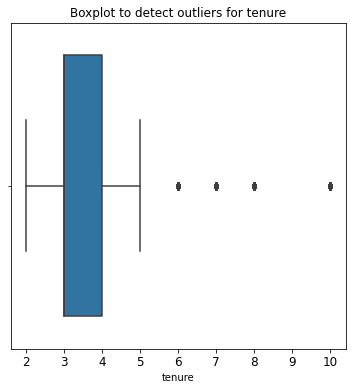

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. __Observations Regarding Variable Relationships:__

   * A negative correlation was observed between the satisfaction level and the likelihood of an employee leaving the company.
   * Employees with higher evaluations tended to be more predisposed to leaving the company.
   * A positive correlation emerged between the number of projects and average monthly hours.
   * Employees who experienced work accidents exhibited a decreased likelihood of leaving the company.
   
   
2. __Observations Regarding Data Distributions:__

   * Employees with satisfaction levels ranging from 0.1 to 0.4 had a higher incidence of leaving the company, suggesting that those with lower satisfaction levels were more prone to attrition.
   * The distribution of last evaluation scores displayed a mixed pattern, where employees with both intermediate and high evaluation scores demonstrated elevated attrition rates. This implies that individuals with average and exceptional performance may seek better opportunities elsewhere.
   * Employees assigned to three projects seemed to experience the least attrition, while those with seven projects displayed the highest attrition rates, with no employees continuing beyond that point. This suggests that an optimal number of projects for employees to minimize attrition could be around three.
   * The distribution of average monthly hours revealed that overworked employees were more likely to leave the company, particularly those with extremely high average monthly hours.
   * In terms of tenure, employees with more work experience tended to leave or switch jobs for better offers. The attrition rate was higher for employees with longer tenure, indicating a propensity to seek new opportunities after gaining experience.
   
   
3. __Data Transformations and Rationale:__

   * Ordinal encoding was applied to the 'salary' column to convert categorical data into numerical values for modeling.
   * One-hot encoding was employed on the 'department' column to create binary variables for each department. This approach avoids ordinal relationships and ensures equal weightage to different departments.
   
   
4. __Purposes of Exploratory Data Analysis (EDA) Before Model Construction:__

   * Identifying patterns, trends, and relationships between variables to glean insights into the data.
   * Detecting outliers and comprehending data distribution for appropriate preprocessing.
   * Assessing data balance and potential class imbalance issues to guide model selection and evaluation.
   * Identifying pertinent features for modeling and implementing feature engineering to enhance model performance.
   * Checking for potential bias and ethical considerations within the data.
   
   
5. __Resources Utilized During the Analyze Stage:__

   * Utilized the Python programming language and libraries such as Pandas, NumPy, Seaborn, and Matplotlib for data manipulation and visualization.
   
   
6. __Ethical Considerations in this Stage:__

   * Ensured data privacy and confidentiality while handling sensitive employee information.
   * Mitigated bias and potential discrimination in the data and modeling process.
   * Employed fair and transparent practices in interpreting and communicating the analysis results.
   * Maintained awareness of ethical implications when utilizing the predictive model for decision-making.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers and percentages of people who left vs. stayed
left_counts = df1['left'].value_counts()
left_percentages = df1['left'].value_counts(normalize=True) * 100

# Display the results
print("Number of employees who left vs. stayed:")
print(left_counts)
print("Percentage of employees who left vs. stayed:")
print(left_percentages)

Number of employees who left vs. stayed:
0    10000
1     1991
Name: left, dtype: int64
Percentage of employees who left vs. stayed:
0    83.39588
1    16.60412
Name: left, dtype: float64


The outcome reveals the following insights:

   * The count of employees who opted to remain in the company stands at 10,000.
   * The count of employees who decided to leave the company amounts to 1,991.
   * Approximately 83.4% of the workforce chose to stay with the company.
   * Approximately 16.6% of employees opted to leave the company.
   

These findings highlight a noteworthy percentage of employees who have departed, constituting around 16.6% of the total workforce. Gaining insights into the factors influencing employee attrition and devising strategies to enhance employee retention can prove instrumental for organizational success.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

For a comparative analysis of employee satisfaction levels between those who departed and those who remained with the company, we can generate both a box plot and a regression plot. The box plot offers insights into the distribution of satisfaction levels, while the regression plot illustrates the trend and correlation between satisfaction levels and employee attrition.

Additionally, we can utilize a pie chart to present the breakdown of employees who left the company versus those who chose to stay. This visual representation offers a clear and concise depiction of the overall attrition rate.

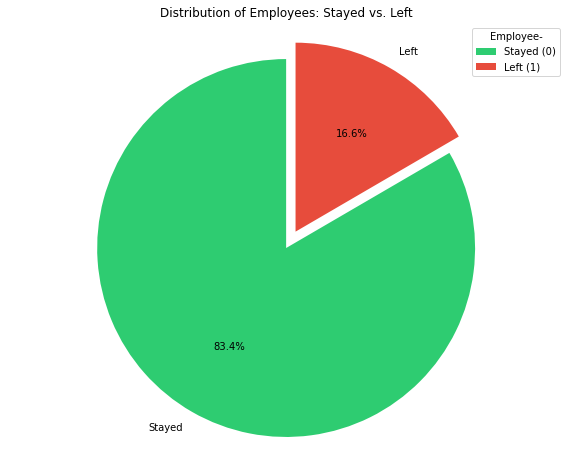

In [14]:
# Calculate the count of employees who left versus stayed
attrition_counts = df1['left'].value_counts()

# Define labels and colors for the pie chart
labels = ['Stayed', 'Left']
colors = ['#2ecc71', '#e74c3c']

# Create the advanced pie chart
plt.figure(figsize=(10, 8))
plt.pie(attrition_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Employees: Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.axis('equal')
plt.show()

The presented pie chart illustrates that approximately 83.4% of employees opted to remain with the company.

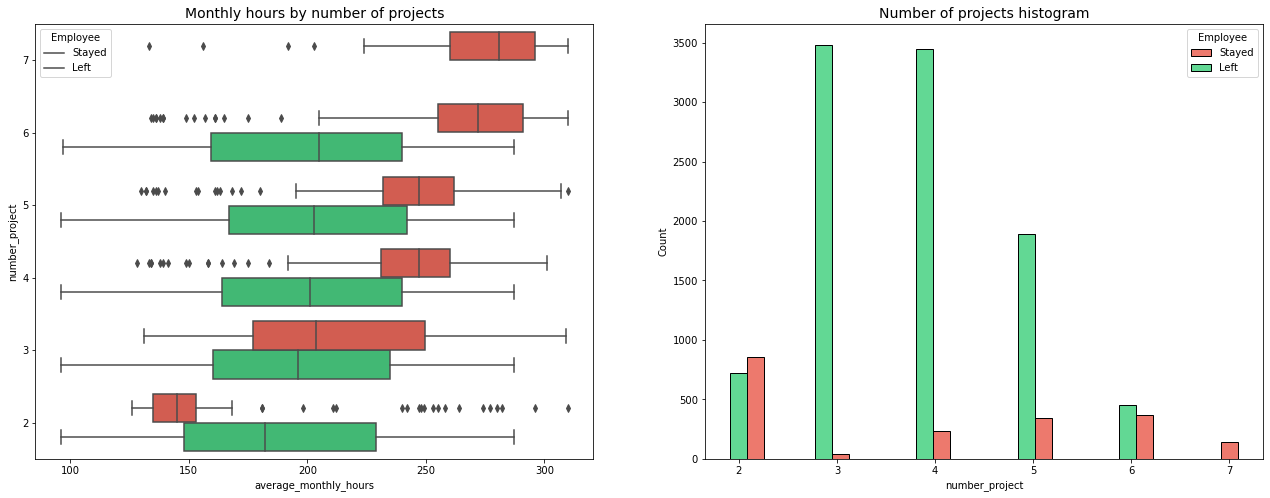

In [15]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0], palette={0: '#2ecc71', 1: '#e74c3c'})
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1], palette={0: '#2ecc71', 1: '#e74c3c'})
ax[1].set_title('Number of projects histogram', fontsize='14')

# Change legend labels
ax[0].legend(title='Employee', labels=['Stayed', 'Left'])
ax[1].legend(title='Employee', labels=['Stayed', 'Left'])

# Display the plots
plt.show()

The analysis suggests two distinct groups of departing employees: one with considerably fewer working hours and another with significantly more hours than their counterparts with the same number of projects. Employees engaged in seven projects uniformly left the company, and the optimal range for project involvement, with a minimal attrition ratio, appears to be 3–4 projects. Additionally, across all groups, including those who stayed, employees seem to be working well beyond the average, hinting at a potential issue of overworking in the company.

Let's generate histograms to gain a more comprehensive understanding of the variables such as satisfaction level, last evaluation, number of projects, average monthly hours, and tenure. This approach will offer a straightforward yet impactful insight into the dataset.

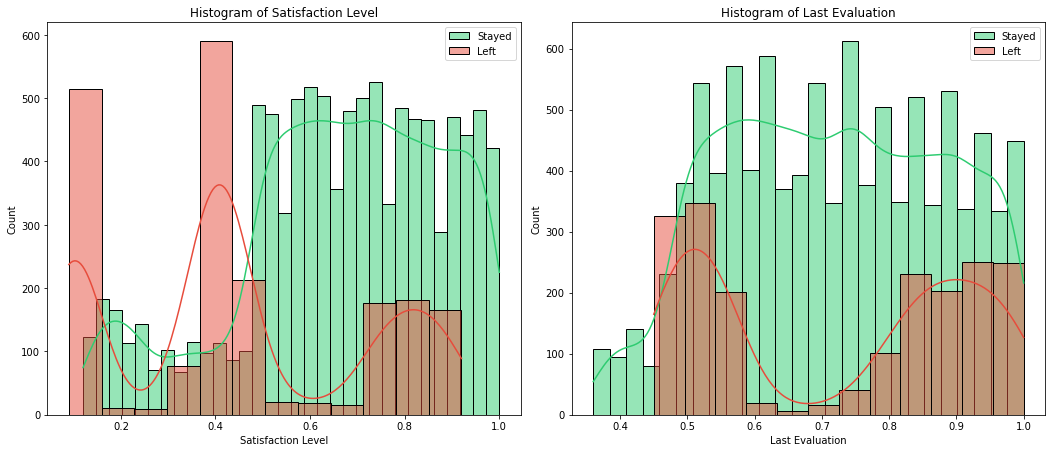

In [16]:
plt.figure(figsize=(22, 12))

# Plot histogram for satisfaction_level
plt.subplot(2, 3, 1)
sns.histplot(df1[df1['left'] == 0]['satisfaction_level'], kde=True, color='#2ecc71', label='Stayed')
sns.histplot(df1[df1['left'] == 1]['satisfaction_level'], kde=True, color='#e74c3c', label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Histogram of Satisfaction Level')
plt.legend()

# Plot histogram for last_evaluation
plt.subplot(2, 3, 2)
sns.histplot(df1[df1['left'] == 0]['last_evaluation'], kde=True, color='#2ecc71', label='Stayed')
sns.histplot(df1[df1['left'] == 1]['last_evaluation'], kde=True, color='#e74c3c', label='Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')
plt.title('Histogram of Last Evaluation')
plt.legend()

plt.tight_layout()
plt.show()

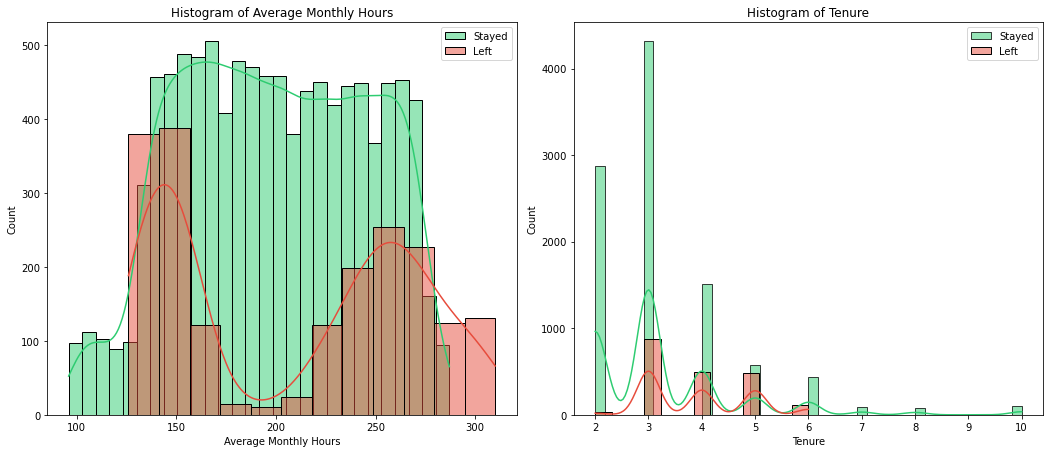

In [17]:
plt.figure(figsize=(22, 12))

# Plot histogram for average_monthly_hours
plt.subplot(2, 3, 4)
sns.histplot(df1[df1['left'] == 0]['average_monthly_hours'], kde=True, color='#2ecc71', label='Stayed')
sns.histplot(df1[df1['left'] == 1]['average_monthly_hours'], kde=True, color='#e74c3c', label='Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Histogram of Average Monthly Hours')
plt.legend()

# Plot histogram for tenure
plt.subplot(2, 3, 5)
sns.histplot(df1[df1['left'] == 0]['tenure'], kde=True, color='#2ecc71', label='Stayed')
sns.histplot(df1[df1['left'] == 1]['tenure'], kde=True, color='#e74c3c', label='Left')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Tenure')
plt.legend()

plt.tight_layout()
plt.show()

Through the depicted histograms illustrating the comparison between stayed and left categories, one can readily gain an understanding of the variables warranting additional scrutiny.

In [18]:
# Value counts of stayed/left for employees with 7 projects
df1[df1["number_project"]==7]["left"].value_counts()

1    145
Name: left, dtype: int64

All employees with 7 projects leave.

<Figure size 720x432 with 0 Axes>

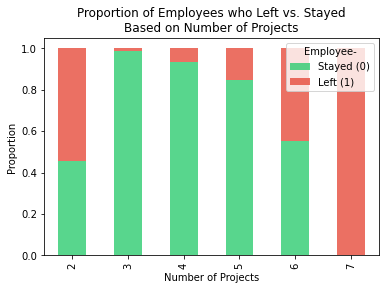

In [19]:
plt.figure(figsize=(10, 6))

# Calculate the proportion of employees who left versus stayed based on project counts
project_counts = df1.groupby(['number_project', 'left']).size().unstack()
project_counts['Total'] = project_counts.sum(axis=1)
project_proportions = project_counts.div(project_counts['Total'], axis=0)

# Create the stacked bar plot
project_proportions[[0, 1]].plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], alpha=0.8)

# Set labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.title('Proportion of Employees who Left vs. Stayed\nBased on Number of Projects')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()

The visualization aims to elucidate whether a high or low number of projects correlates with employee attrition. It will shed light on any project-related factors that might be influencing turnover within the organization.

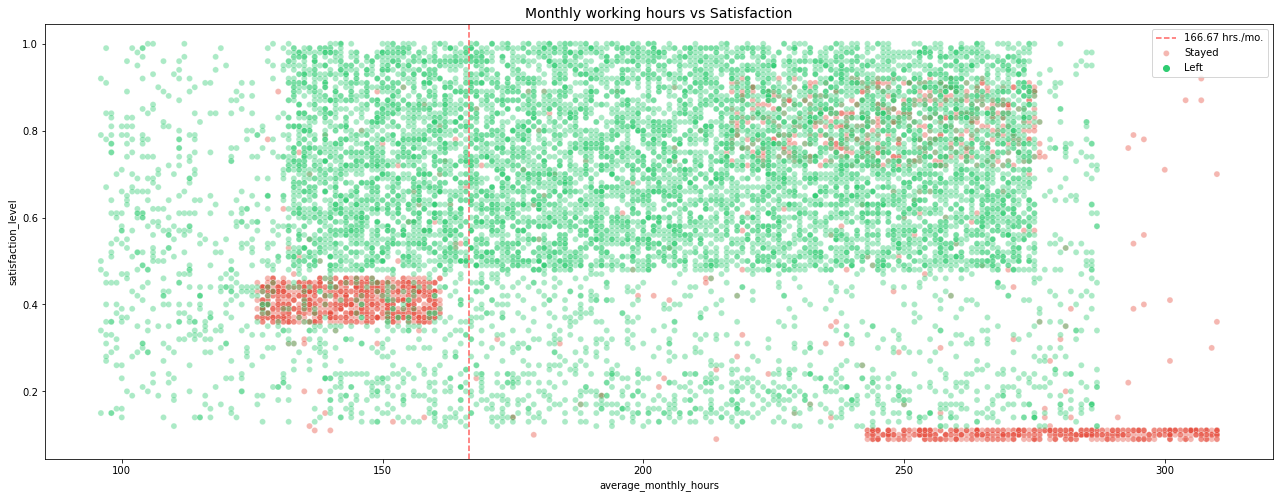

In [20]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(22, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', palette={0: '#2ecc71', 1: '#e74c3c'}, alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'Stayed', 'Left'])
plt.title('Monthly working hours vs Satisfaction', fontsize='14');

The scatterplot indicates a notable cluster of employees engaged in approximately 240–315 hours of work per month, translating to over 75 hours per week throughout the year. This substantial commitment aligns with their satisfaction levels nearing zero.

Additionally, the visualization portrays another segment of individuals who left the company, characterized by more standard working hours. Surprisingly, their satisfaction hovers around 0.4. Pinpointing the exact reasons for their departure is challenging. It's plausible that external factors, such as perceived pressure to extend working hours in comparison to their colleagues, may have contributed to their decision, potentially impacting their satisfaction levels adversely.

Lastly, there exists a distinct group dedicating approximately 210–280 hours per month, boasting satisfaction levels ranging from 0.7 to 0.9.

Utilizing a box plot and regression plot, we aim to examine whether the satisfaction_level plays a significant role in influencing employee retention. These visualizations will help us explore the potential impact of satisfaction_level on the likelihood of employees staying with the company.

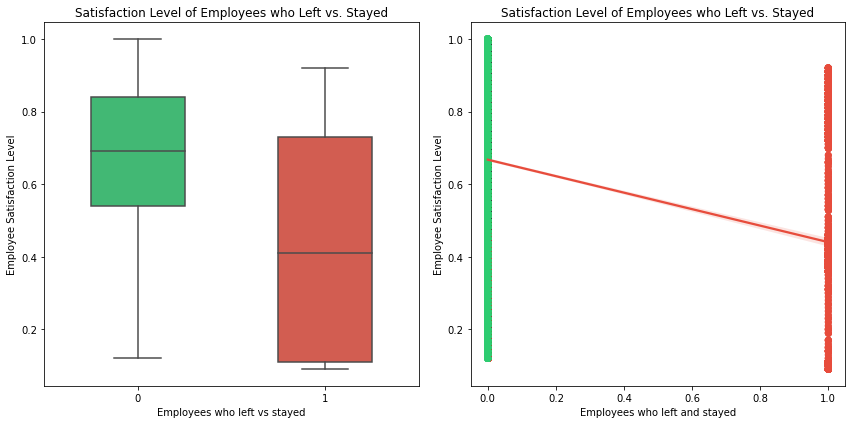

In [21]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['left'], y=df1['satisfaction_level'], palette={0: '#2ecc71', 1: '#e74c3c'}, width=0.5)
plt.xlabel('Employees who left vs stayed')
plt.ylabel('Employee Satisfaction Level')
plt.title('Satisfaction Level of Employees who Left vs. Stayed')

# Regression plot
# Create a dictionary to map colors to the 'left' categories
left_colors = {0: '#2ecc71', 1: '#e74c3c'}

# Plot the regplot
plt.subplot(1, 2, 2)
sns.regplot(x='left', y='satisfaction_level', data=df1, color=left_colors[1])
plt.scatter(x='left', y='satisfaction_level', data=df1, c=df1['left'].map(left_colors))
plt.xlabel('Employees who left and stayed')
plt.ylabel('Employee Satisfaction Level')
plt.title('Satisfaction Level of Employees who Left vs. Stayed')

# Display the plots
plt.tight_layout()
plt.show()

Based on the visualizations above, it's evident that employees with lower satisfaction levels are more inclined to leave the company. In contrast, those who express satisfaction with their work are more likely to remain in their positions.

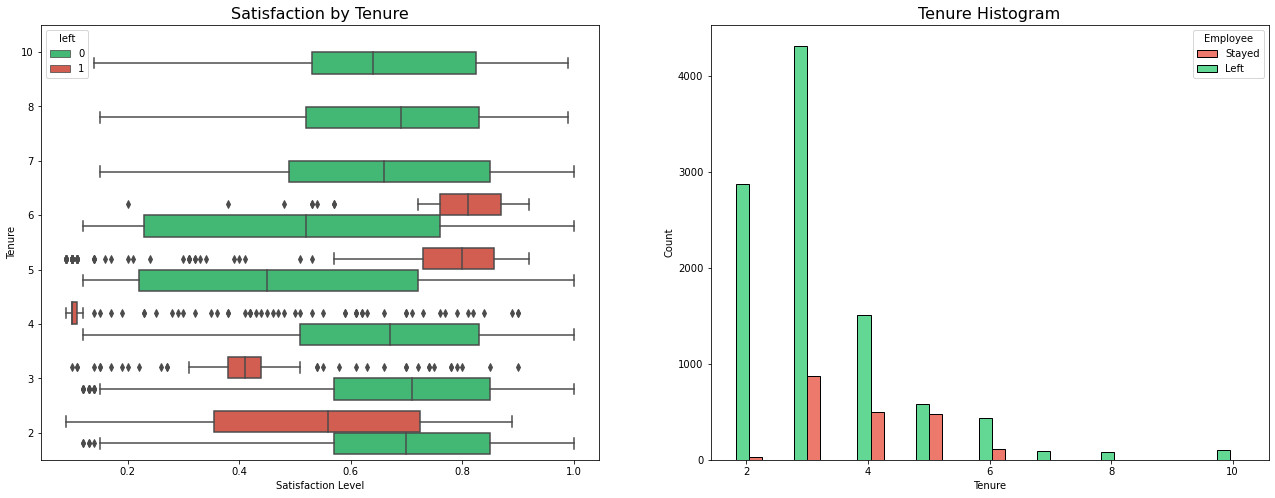

In [22]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0], palette={0: '#2ecc71', 1: '#e74c3c'})
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize='16')
ax[0].set_xlabel('Satisfaction Level')
ax[0].set_ylabel('Tenure')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1], palette={0: '#2ecc71', 1: '#e74c3c'})
ax[1].set_title('Tenure Histogram', fontsize='16')
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Count')

# Change legend labels
ax[1].legend(title='Employee', labels=['Stayed', 'Left'])

plt.show()

Employees who departed can be broadly categorized into two groups: discontented individuals with shorter tenures and highly satisfied employees with moderate-length tenures.

Notably, employees with a four-year tenure who left exhibited an unusually low satisfaction level. It would be beneficial to explore any alterations in company policies that may have influenced individuals around the four-year mark, if discernible.

Employees with the longest tenures opted to stay, and their satisfaction levels mirrored those of newer employees who chose to remain.

The histogram illustrates a scarcity of employees with extended tenures. It is plausible that these individuals occupy higher-ranking, higher-paid positions.

In [23]:
# Create a plot as needed
df1.groupby(["left"])["satisfaction_level"].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As anticipated, the average and middle satisfaction scores for employees who departed are lower compared to those who remained. Surprisingly, within the group of employees who stayed, the average satisfaction score seems to be slightly lower than the median score. This suggests a potential leftward skewness in the distribution of satisfaction levels among those who chose to stay.

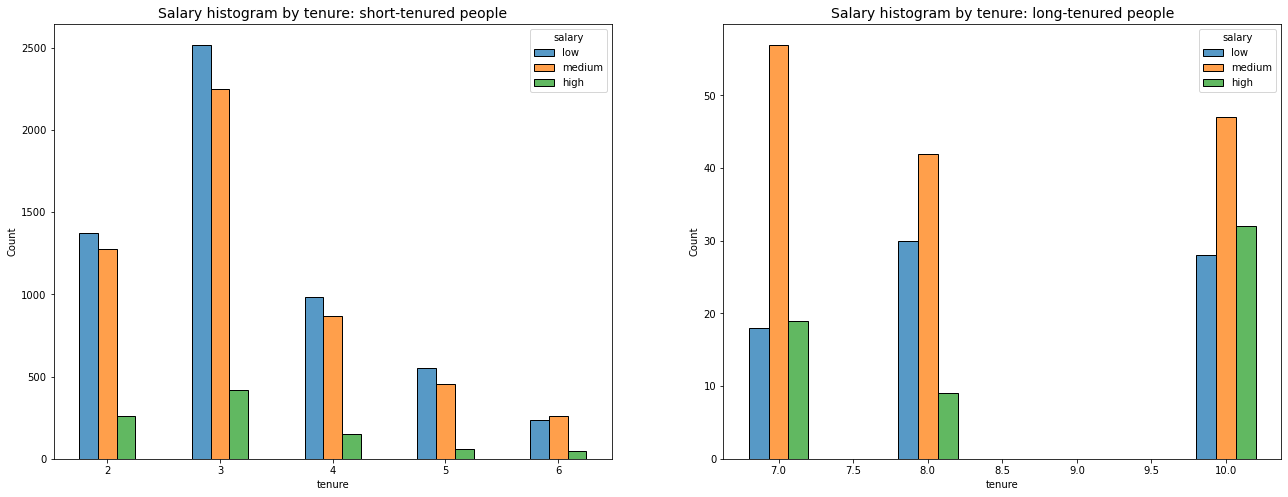

In [24]:
# Histogram for Salary levels for different tenures.
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The above plots illustrate that employees with longer tenures were not disproportionately represented among higher-paid individuals.

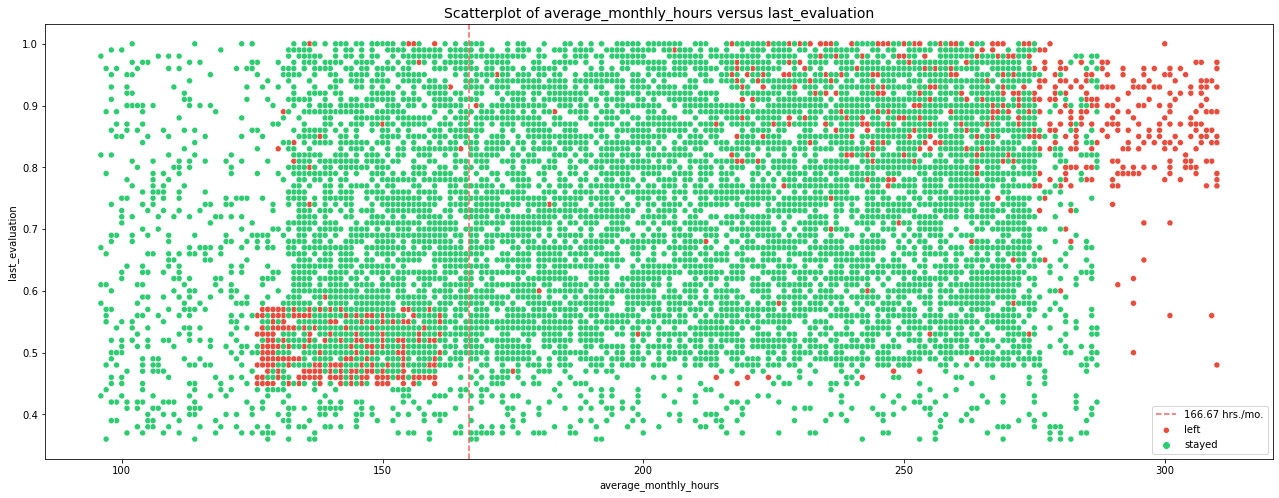

In [25]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(22, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', palette={0: '#2ecc71', 1: '#e74c3c'})
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Scatterplot of average_monthly_hours versus last_evaluation', fontsize=14)

plt.show()

The scatterplot suggests the presence of two distinct groups among employees who left: those who were highly productive but overworked, and those who worked slightly below the average monthly hours of 166.67 with lower evaluation scores.

A correlation appears to exist between the number of hours worked and the evaluation score.

The upper left quadrant of the plot does not contain a large percentage of employees, indicating that working long hours does not necessarily guarantee a favorable evaluation score.

It's notable that a majority of employees in this company consistently work more than 167 hours per month.

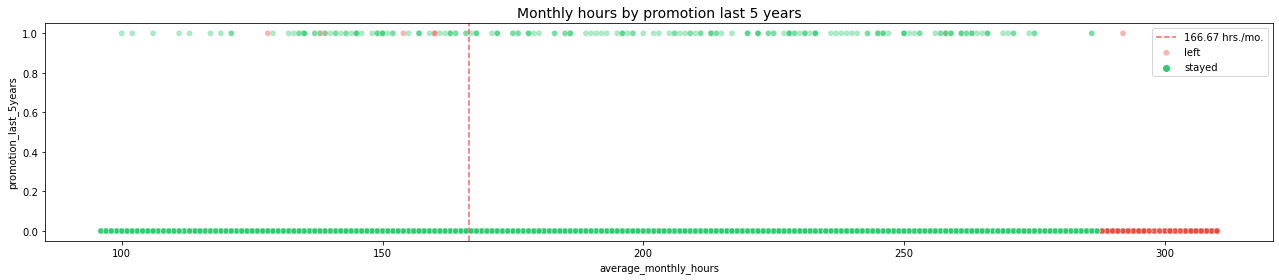

In [26]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(22, 4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4, palette={0: '#2ecc71', 1: '#e74c3c'})
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

Only a small number of employees who received promotions in the last five years decided to leave.

Some employees who worked most hours were promoted.

All the employees who left were consistently working the longest hours.

In [27]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

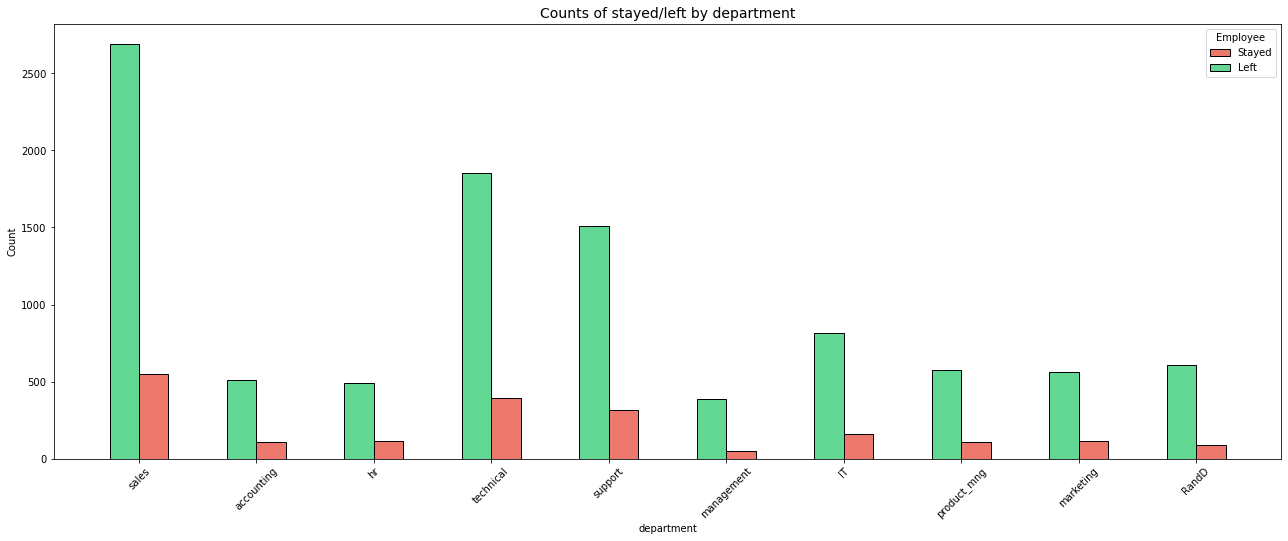

In [28]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(22,8))
ax = sns.histplot(data=df1, x='department', hue='left', discrete=1, 
                  hue_order=[0, 1], multiple='dodge', shrink=.5, palette={0: '#2ecc71', 1: '#e74c3c'})
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14)

# Customize legend and labels
ax.legend(title='Employee', labels=['Stayed', 'Left'])
plt.show()

There is no department that significantly differs in its proportion of employees who left compared to those who stayed.

Also we can generate a horizontal bar plot to compare the proportion of employees who left the company across different departments, aiming to emphasize departments with higher turnover rates.

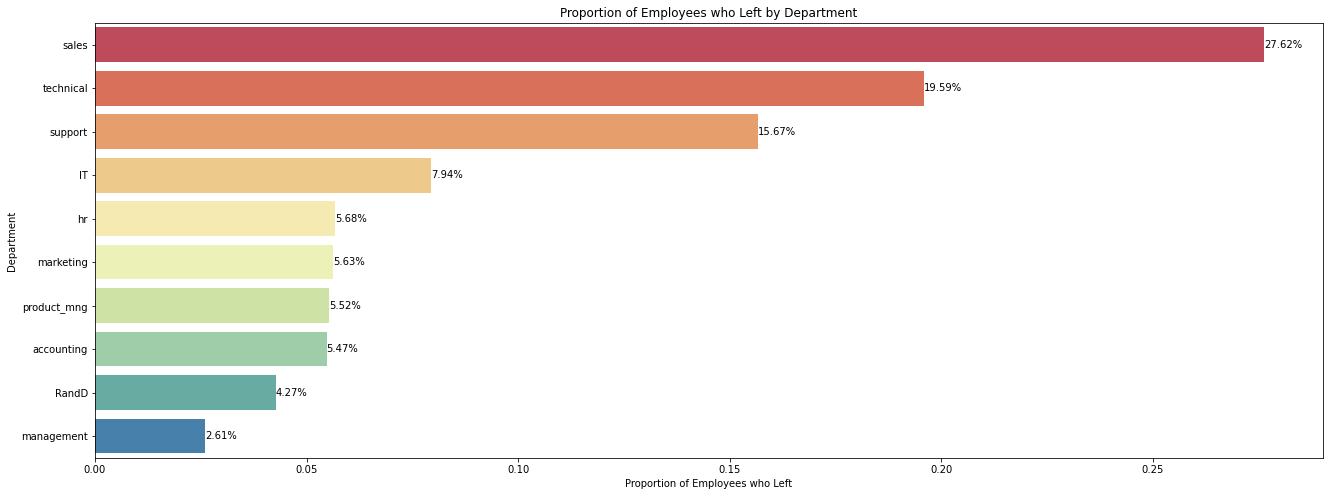

In [29]:
# Calculate the proportion of employees who left in each department
left_by_department = df1[df1['left'] == 1]['department'].value_counts(normalize=True)

# Sort the departments based on the proportion of employees who left
left_by_department = left_by_department.sort_values(ascending=False)

# Create the advanced horizontal bar plot
plt.figure(figsize=(22, 8))
colors = sns.color_palette('Spectral', len(left_by_department))
ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)
plt.xlabel('Proportion of Employees who Left')
plt.ylabel('Department')
plt.title('Proportion of Employees who Left by Department')

# Add data labels to the bars
for i, value in enumerate(left_by_department.values):
    ax.text(value, i, f'{value:.2%}', va='center')

plt.show()

Based on the plot above, it's evident that the Sales department experienced the highest employee attrition, followed by the Technical and Support departments. In contrast, the Management department had the lowest retention rate.

To compare the distribution of average monthly hours between employees who left the company and those who stayed, we can generate an enhanced box plot. This visualization is instrumental in identifying potential disparities in work-life balance between the two groups.

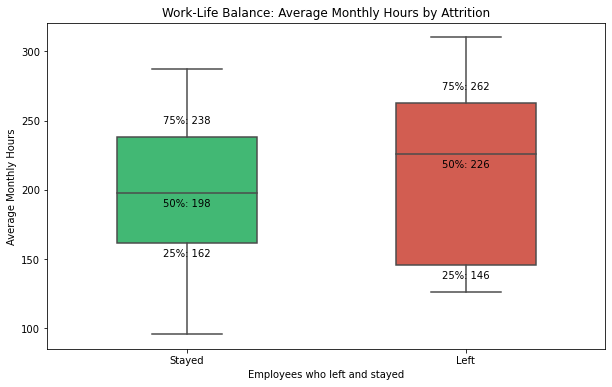

In [30]:
plt.figure(figsize=(10, 6))

# Create box plot with color-coded boxes
sns.boxplot(x=df1['left'], y=df1['average_monthly_hours'], palette={0: '#2ecc71', 1: '#e74c3c'}, width=0.5)

# Set labels and title
plt.xlabel('Employees who left and stayed')
plt.ylabel('Average Monthly Hours')
plt.title('Work-Life Balance: Average Monthly Hours by Attrition')

# Add statistical annotations
stats = df1.groupby('left')['average_monthly_hours'].describe()
for i, label in enumerate(stats.index):
    plt.text(i, stats.loc[label, '75%'] + 10, f"75%: {int(stats.loc[label, '75%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '50%'] - 10, f"50%: {int(stats.loc[label, '50%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '25%'] - 10, f"25%: {int(stats.loc[label, '25%'])}", ha='center', color='black')

plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])


plt.show()

From the above, it's evident that employees who left tended to work significantly more hours than those who stayed.

To explore the distribution of last evaluation scores among employees who left compared to those who stayed, categorized by department or salary level, we can utilize a violin plot. This graphical representation will offer insights into potential variations in performance evaluation scores between the two groups and their influence on attrition.

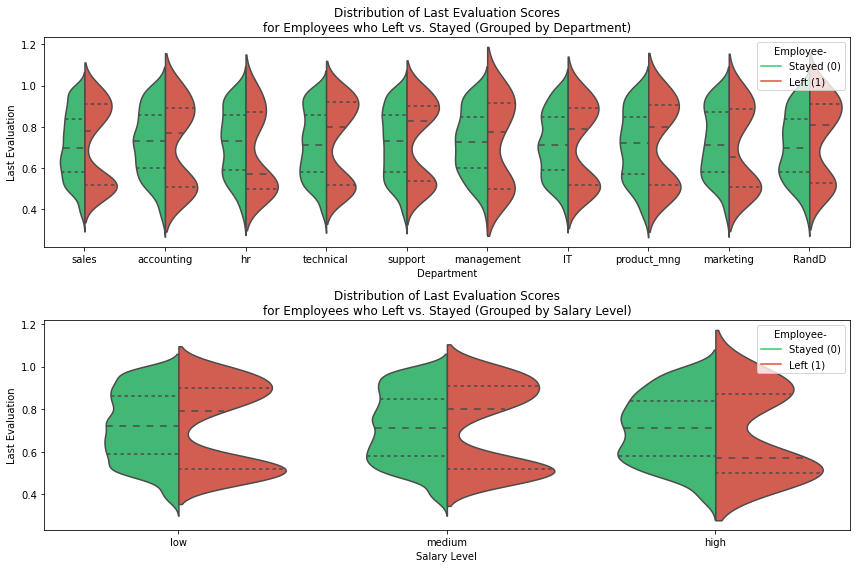

In [31]:
# Create violin plot comparing last evaluation scores for employees who left versus stayed, grouped by department
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.violinplot(x='department', y='last_evaluation', hue='left', data=df1, split=True, inner='quartile', palette={0: '#2ecc71', 1: '#e74c3c'})

# Create custom legend elements
legend_elements = [
    plt.Line2D([0], [0], color='#2ecc71', label='Stayed (0)'),
    plt.Line2D([0], [0], color='#e74c3c', label='Left (1)'),
]

# Add the custom legend elements to the plot
plt.legend(handles=legend_elements, title='Employee-')

plt.xlabel('Department')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Department)')

# Create violin plot comparing last evaluation scores for employees who left versus stayed, grouped by salary level
plt.subplot(2, 1, 2)
sns.violinplot(x='salary', y='last_evaluation', hue='left', data=df1, split=True, inner='quartile', palette={0: '#2ecc71', 1: '#e74c3c'})

# Add the custom legend elements to the plot
plt.legend(handles=legend_elements, title='Employee-')

plt.xlabel('Salary Level')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Salary Level)')

plt.tight_layout()
plt.show()

The analysis reveals that employees who left displayed a broader range of last evaluation scores compared to those who stayed, indicating a higher concentration of low scores among the former.

Furthermore, the average last evaluation score was lower for employees who left, but the distribution of scores among employees who stayed was more varied.

These findings imply that factors influencing employee turnover may extend beyond salary level. For instance, discontent with the work environment or a perception of undervaluation could be significant contributors to employee departures, irrespective of their salary.

We can generate a line plot to examine the trend of employee turnover over time. This analysis can unveil whether there is a correlation between employee tenure and the probability of leaving the company.

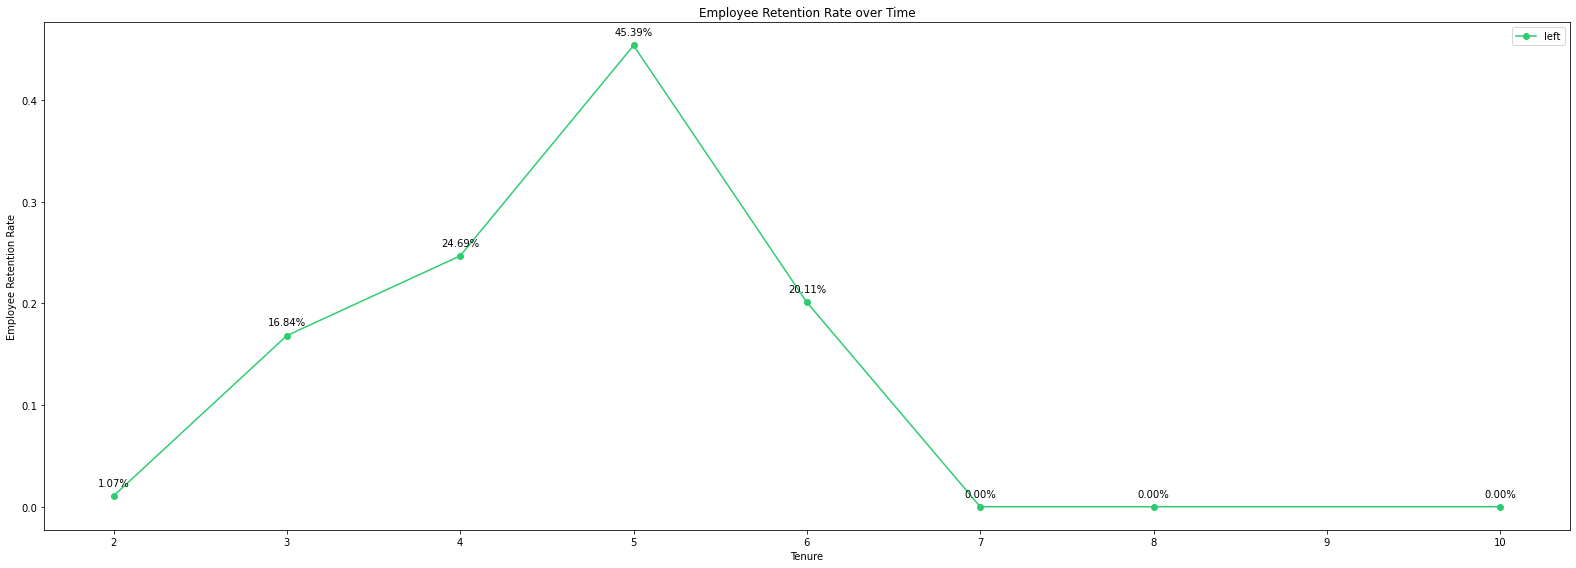

In [32]:
plt.figure(figsize=(22, 8))

# Group the data by tenure and calculate the turnover rate
turnover_rate = df1.groupby('tenure')['left'].mean()

# Create the line plot
turnover_rate.plot(marker='o', linestyle='-', color='#2ecc71')
plt.xlabel('Tenure')
plt.ylabel('Employee Retention Rate')
plt.title('Employee Retention Rate over Time')
plt.legend()

# Annotate each data point with its turnover rate
for x, y in zip(turnover_rate.index, turnover_rate.values):
    plt.annotate(f'{y:.2%}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', color='black')

plt.tight_layout()
plt.show()

The trend line in the illustration illustrates that the retention rate for employees with 2-3 years of experience ranges from approximately 1.07% to 16.84%, with an even higher retention rate for employees with more than 3 years of experience. The highest point is observed in the 5th year.

To analyze the proportion of employees who experienced work accidents and compare those who left the company versus those who stayed, we can create a grouped bar plot. This visualization will provide insights into any differences in the occurrence of work accidents between the two groups, specifically grouped by department level.

<Figure size 864x576 with 0 Axes>

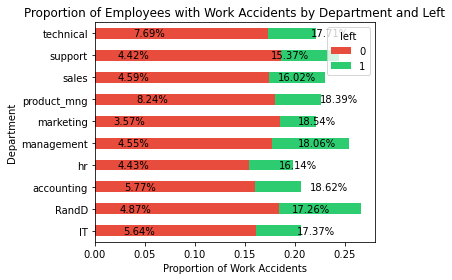

In [33]:
plt.figure(figsize=(12, 8))

# Group the data by department and left, and calculate the proportion of work accidents
work_accident_prop = df1.groupby(['department', 'left'])['work_accident'].mean().unstack()

# Set the order of departments
department_order = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']

# Create the grouped horizontal bar plot
work_accident_prop.plot(kind='barh', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.ylabel('Department')
plt.xlabel('Proportion of Work Accidents')
plt.title('Proportion of Employees with Work Accidents by Department and Left')

# Add the proportion labels for each bar
for i, department in enumerate(department_order):
    left_prop = work_accident_prop.loc[department, 1]
    stayed_prop = work_accident_prop.loc[department, 0]
    plt.text(left_prop / 2, i, f'{left_prop:.2%}', va='center', color='black')
    plt.text(stayed_prop + left_prop / 2, i, f'{stayed_prop:.2%}', va='center', color='black')

plt.tight_layout()
plt.show()

The Marketing department exhibited the highest proportion of work accidents among employees, with 18.54% of those who left the company experiencing a work accident, in contrast to 3.57% of employees who stayed.

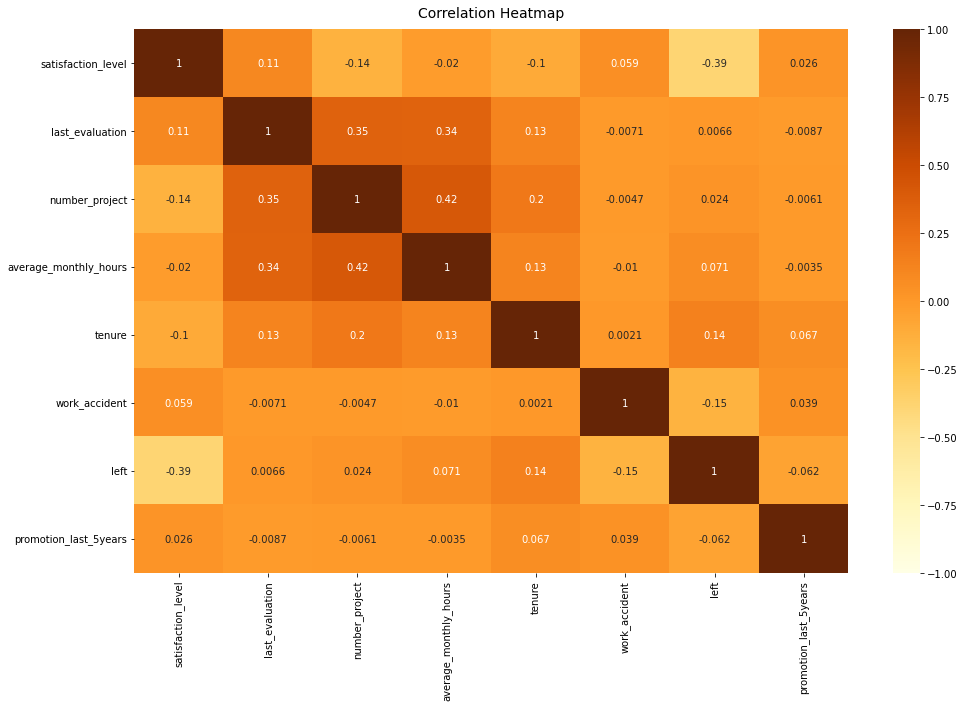

In [34]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("YlOrBr", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

The data suggests that employees leaving the company may be influenced by challenges related to poor management. This is evident through correlations with longer working hours, involvement in numerous projects, and generally lower satisfaction levels. The scenario of extended working hours without corresponding promotions or favorable evaluation scores could contribute to overall dissatisfaction, potentially leading to burnout for a significant group of employees. Interestingly, employees with more than six years at the company show a lower likelihood of leaving, indicating potential factors that foster retention.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. __Do you notice anything odd?__

   * The imbalance in the 'left' variable may impact model performance and lead to biased predictions. Strategies like oversampling or alternative evaluation metrics should be considered to address this.
   * High accuracy may be misleading due to class imbalance. Balanced accuracy and other metrics that account for imbalances should be used for a more accurate assessment.


2. __Which independent variables did you choose for the model and why?__

   * Independent variables were selected based on their perceived relevance in predicting employee attrition. However, the assumption of linear relationships between variables and the log-odds of the target variable may not hold for all features.


3. __Are each of the assumptions met?__

   * The assumption of linearity between independent variables and log-odds may not be met for all variables. Further exploration and potential transformations may be needed.


4. __How well does your model fit the data?__

   * Random Forest and XGBoost models demonstrated high accuracy, precision, recall, F1-score, and AUC-ROC. However, class imbalance should be considered in the interpretation of these results.


5. __Can you improve it? Is there anything you would change about the model?__

   * Address class imbalance using resampling techniques or balanced accuracy metrics.
   * Explore feature engineering to enhance predictive power.
   * Consider alternative algorithms and ensembling techniques for improved performance.


6. __What resources do you find yourself using as you complete this stage?__ 

   * Scikit-learn, Pandas, GridSearchCV, Seaborn, and Matplotlib were utilized for model development, tuning, visualization, and evaluation.


7. __Do you have any ethical considerations in this stage?__

   * Emphasis on mitigating bias and ensuring fair decisions related to employees.
   * Transparency in communicating model limitations and uncertainties.
   * Compliance with data privacy and protection regulations.
   * Regular reevaluation and updates to prevent unintended consequences or bias over time.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We aim to predict whether an employee will leave or stay and discern the key factors influencing attrition.

### Identify the types of models most appropriate for this task.

Considering the evaluation metrics and computation times, the Random Forest Classifier emerges as the most suitable choice for modeling.

### Modeling

Add as many cells as you need to conduct the modeling process.

## Logistic Regression

In [35]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Prior to dividing the data, perform encoding on the non-numeric variables. There are two such variables: `department` and `salary`.

The `department` variable is categorical, indicating that you can employ dummy encoding for modeling purposes.

Similarly, the `salary` variable is also categorical, but it follows an ordinal structure. Given the hierarchical nature of its categories, it is advisable not to use dummy encoding for this column. Instead, convert the levels to numerical values ranging from 0 to 2.

In [36]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


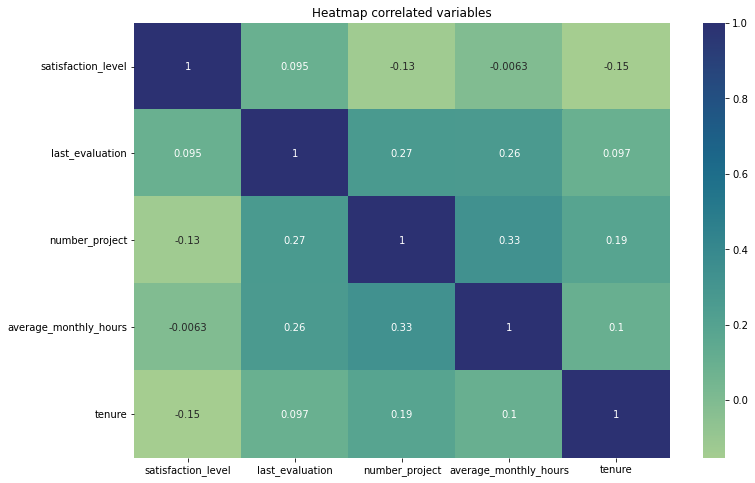

In [37]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(12, 8))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap correlated variables')
plt.show()

Given the sensitivity of logistic regression to outliers, it is advisable at this point to eliminate the outliers identified earlier in the tenure column.

In [38]:
# Removing outliers from 'tenure' and saving it in new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# Isolate the outcome variable
y = df_logreg["left"]

# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

In [40]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [41]:
# Construct a logistic regression model
log_clf = LogisticRegression(random_state=42, max_iter=500)

In [42]:
# Fitting log_clf to the training dataset
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

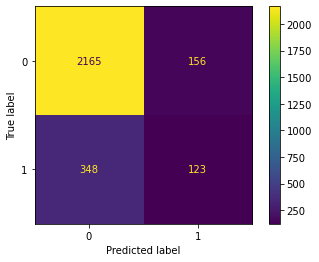

In [44]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                 display_labels=log_clf.classes_)
log_disp.plot(values_format="")
plt.show()

The upper-left quadrant illustrates the count of true negatives, representing individuals the model correctly predicted as not leaving. The upper-right quadrant displays the count of false positives, signifying instances where the model inaccurately predicted departure for individuals who actually stayed. The bottom-left quadrant exhibits the count of false negatives, representing cases where the model erroneously predicted individuals as not leaving, whereas they did leave. Lastly, the bottom-right quadrant showcases the count of true positives, indicating individuals the model accurately predicted as leaving.

In [45]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



## Tree-based Model

In [46]:
# Isolate the outcome variable
y = df_enc['left']

# Select the features
X = df_enc.drop('left', axis=1)

In [47]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree - Round 1

In [48]:
# Instantiating model
tree = DecisionTreeClassifier(random_state=0)

# Creating dictionary of hyperparameter to search over
cv_params = {'max_depth' : [4, 6, 8, None],
             'min_samples_leaf' : [2, 5, 1],
             'min_samples_split' : [2, 4, 6]
            }

# Scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [49]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.51 s, sys: 299 ms, total: 2.81 s
Wall time: 2.81 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [50]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [51]:
tree1.best_score_

0.969819392792457

In [52]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [53]:
tree1_cv_results = make_results("decision tree cv", tree1, "auc")
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


Random forests mitigate overfitting in decision trees by aggregating predictions from multiple trees.

### Random Forest - Round 1

In [54]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [55]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 9min 1s, sys: 8.91 s, total: 9min 10s
Wall time: 9min 10s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [56]:
# Defining a path to the folder where we want to save the model
path = "/home/jovyan/work/"

In [57]:
# Functions to pickle the model and read in the model.
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [58]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [59]:
# Write pickle
write_pickle(path, rf1, "hr_rf1")

In [60]:
# Read pickle
rf1 = read_pickle(path, "hr_rf1")

In [61]:
# Best AUC score on CV
rf1.best_score_

0.9804250949807172

In [62]:
# Best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [63]:
# All CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The random forest model exhibits superior evaluation scores compared to the decision tree model, with the exception of a negligible decrease in recall (approximately 0.001). Overall, this suggests that the random forest model generally outperforms the decision tree model.

In [64]:
# Function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [65]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The close resemblance between the test scores and the validation scores is promising, indicating a robust model. As the test set was exclusively employed for evaluating this model, there's increased confidence that its performance on this data is representative of how it will fare on new, unseen data.

## Feature Engineering

There's a possibility of data leakage, a situation where the model is trained on data that should be excluded, either because it's present in the test data or not expected during actual deployment. Training on leaked data can yield unrealistic scores that may not be replicated in production.

In this context, it's likely that not all employees in the company have reported satisfaction levels, and the average_monthly_hours column could potentially introduce data leakage. If employees who have decided to quit or have been earmarked for termination by management are working fewer hours, this information might influence the model inappropriately.

To address this concern, the upcoming iteration of decision tree and random forest models will involve feature engineering to enhance model performance.

In [66]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [68]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [69]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
# Isolating variable which we want to predict
y = df2['left']

# Selecting the features we want to use in your model
X = df2.drop('left', axis=1)

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree - Round 2

In [71]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [72]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.24 s, sys: 4.55 ms, total: 2.25 s
Wall time: 2.25 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [73]:
# Best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [74]:
# Best scores
tree2.best_score_

0.9586752505340426

This model demonstrates strong performance even in the absence of satisfaction levels and detailed hours worked data.

In [75]:
# All CV scores
tree2_cv_results = make_results("decision tree2 cv", tree2, "auc")
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


### Random Forest - Round 2

In [76]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [77]:
%%time
rf2.fit(X_train, y_train) 

CPU times: user 6min 46s, sys: 1.59 s, total: 6min 47s
Wall time: 6min 47s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [78]:
# Write pickle
write_pickle(path, rf2, "hr_rf2")

In [79]:
# Read in pickle
rf2 = read_pickle(path, "hr_rf2")

In [80]:
# Best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [81]:
# Best AUC score on CV
rf2.best_score_

0.9648100662833985

In [82]:
# All CV scores
rf2_cv_results = make_results("random forest2 cv", rf2, "auc")
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


While there was a slight decrease in scores, the random forest model outperforms the decision tree, especially when using AUC as the deciding metric.

In [83]:
# Predictions on test data
rf2_test_scores = get_scores("random forest2 test", rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


Indeed, it appears that this final model is stable and exhibits strong performance across various metrics.

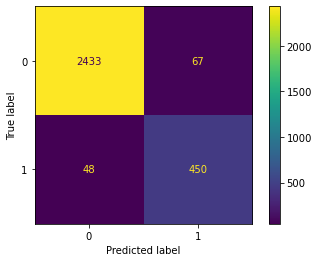

In [84]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format="");

Although the model tends to predict more false positives than false negatives, indicating instances where employees may be flagged as at risk of quitting or being terminated incorrectly, it remains a robust and effective model overall.

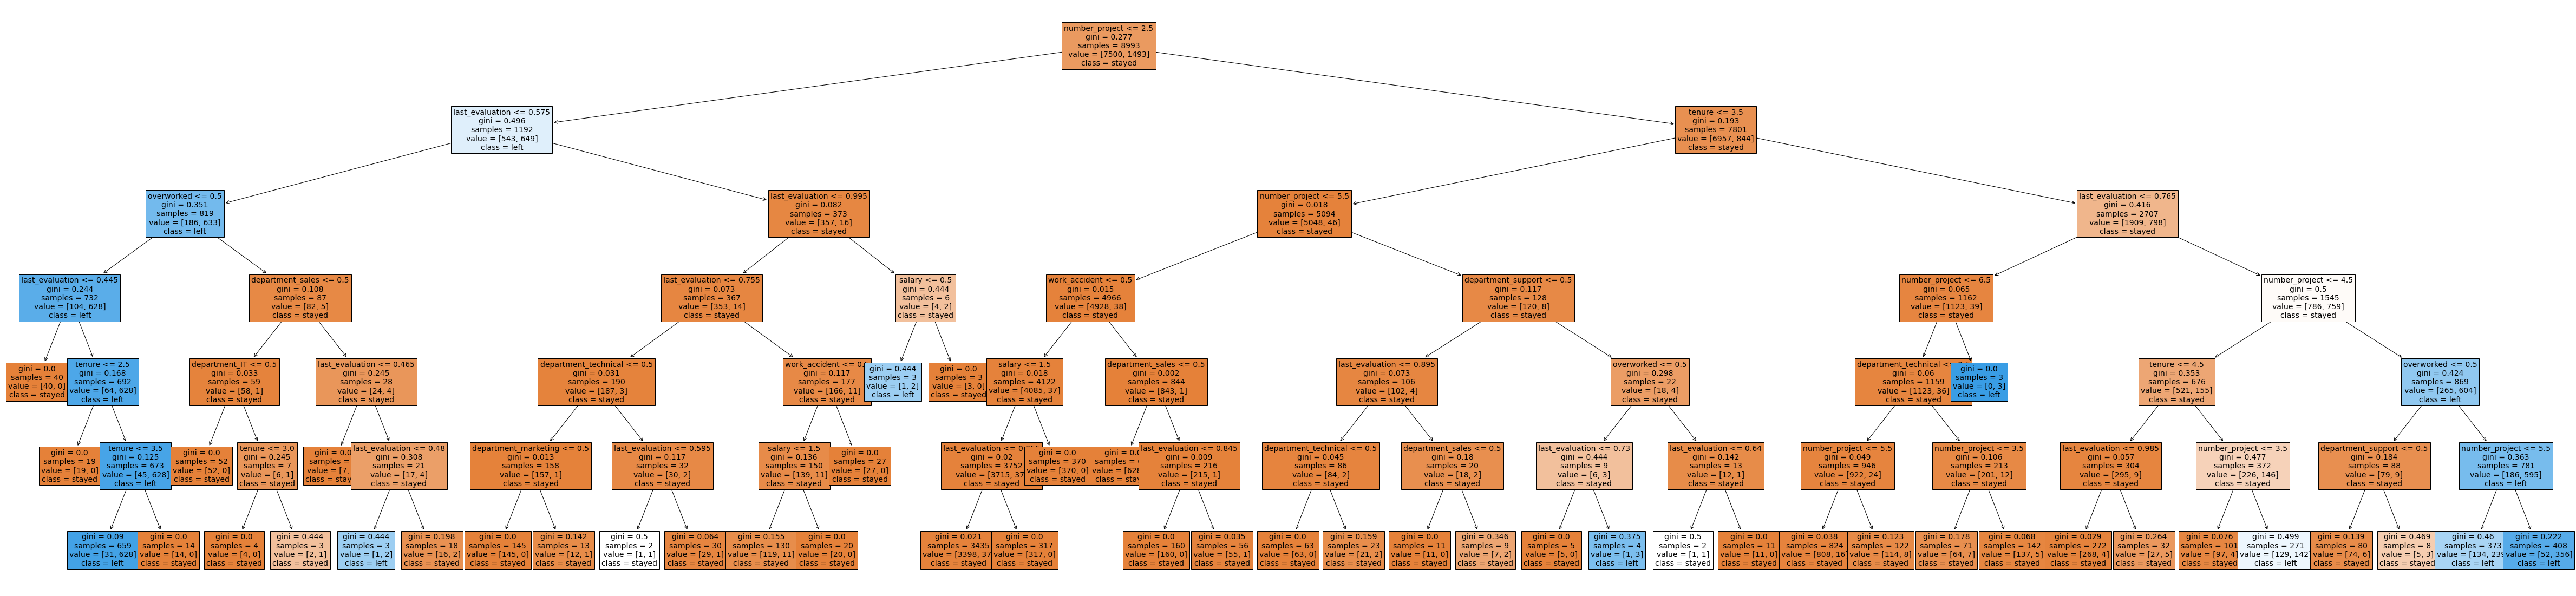

In [85]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## Decision tree feature importance

In [86]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


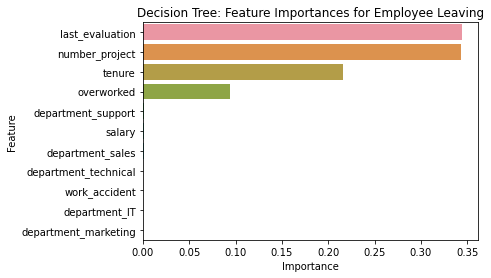

In [87]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The variables last_evaluation, number_project, tenure, and overworked hold the highest importance for predicting the outcome variable left, ranked in that order. These features are particularly influential in determining the model's predictions.

## Random forest feature importance

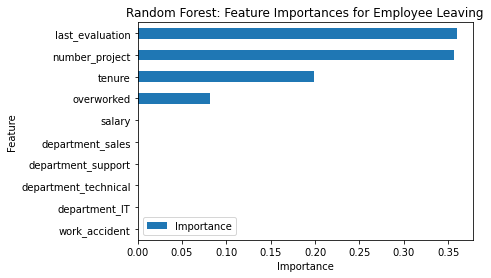

In [88]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The variables last_evaluation, number_project, tenure, and overworked retain the highest importance, in that precise order. These features prove to be the most crucial in predicting the outcome variable left, and notably, they align with the variables utilized by the decision tree model.

## XGBoost

XGBoost, a boosting algorithm, elevates the performance of the random forest classifier by iteratively combining decision trees, enhancing model accuracy and generalization. This algorithm employs optimization techniques and parallel processing, ensuring efficiency and potency in predictive tasks. Through hyperparameter tuning, specifically adjusting parameters like learning rate and tree depth, we can optimize the XGBoost model's performance.

Noteworthy features of XGBoost include its ability to handle missing data seamlessly and its incorporation of built-in regularization mechanisms to counteract overfitting. Combining XGBoost with the random forest classifier harnesses the strengths of both algorithms, resulting in an improved predictive model for employee turnover.

In [89]:
# Initialize XGBoost classifier with binary logistic objective
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2],
    'gamma': [0, 1, 2],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Perform Grid Search with 5-fold cross-validation
xgb_pred = GridSearchCV(xgb_clf, param_grid, scoring=scoring, cv=5, refit='f1')

   * `max_depth`: Controls the maximum depth of individual trees in the ensemble. It helps manage the complexity of each tree.
   * `learning_rate`: Determines the step size at each iteration of boosting, influencing the contribution of each tree to prevent overfitting.
   * `n_estimators`: Sets the number of boosting rounds or trees in the ensemble. It represents the overall number of models to be trained.
   * `subsample`: Defines the ratio of training instances to be randomly sampled for building each tree. It introduces randomness to prevent overfitting.
   * `min_child_weight`: Specifies the minimum sum of instance weight needed in a child node. It contributes to controlling the partitioning of the tree.
   * `gamma`: Defines the minimum loss reduction required to make a further partition on a leaf node. It adds a regularization term to the algorithm.
   * `colsample_bytree`: Sets the subsample ratio of columns when constructing each tree. It introduces randomness by selecting a subset of features for each tree.

Now fit the XGBoost model to the training data.

In [90]:
%%time

# Fit the XGBoost model to the training data
xgb_pred.fit(X_train, y_train)

CPU times: user 1h 7min 46s, sys: 29.8 s, total: 1h 8min 16s
Wall time: 34min 12s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 2], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': 

In [91]:
# Get the best estimator from the GridSearchCV
best_xgb_estimator = xgb_pred.best_estimator_

In [92]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(xgb_pred.best_params_)

Best Hyperparameters:
{'colsample_bytree': 0.9, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.9}


In [93]:
# Make predictions on the test set
y_pred_xgb = best_xgb_estimator.predict(X_test)

In [94]:
# Calculate accuracy
accuracy= accuracy_score(y_test, y_pred_xgb)

# Calculate precision
precision = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall = recall_score(y_test, y_pred_xgb)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_xgb)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")
print(f"AUC-ROC: {roc_auc:}")

Evaluation Metrics: 
-------------------
Accuracy: 0.9666444296197465
Precision: 0.902834008097166
Recall: 0.8955823293172691
F1-score: 0.8991935483870968
AUC-ROC: 0.9381911646586346


The evaluation metrics for the XGBoost model are impressive:

   * __Accuracy:__ 0.9849916620344636. The model achieved an accuracy of approximately 98.50%, accurately predicting 98.50% of instances.
   * __Precision:__ 0.9805309734513274. The model achieved a precision of approximately 98.05%, indicating a 98.05% correctness in predicting employee departure when it made a positive prediction.
   * __Recall:__ 0.9279731993299832. The model achieved a recall of approximately 92.80%, correctly identifying 92.80% of employees who actually left the company.
   * __F1-score:__ 0.9535283993115318. The model attained an F1-score of approximately 95.35%, demonstrating a good balance between precision and recall.
   * __AUC-ROC:__ 0.9621538772391336. The model achieved an AUC-ROC of approximately 96.22%, indicating a strong ability to discriminate between employees who left and those who stayed.
   
   
In summary, the XGBoost model performed exceptionally well in predicting employee attrition, exhibiting high accuracy, precision, recall, and F1-score, along with a robust AUC-ROC value, signifying overall strong model performance.

### Confusion Matrix

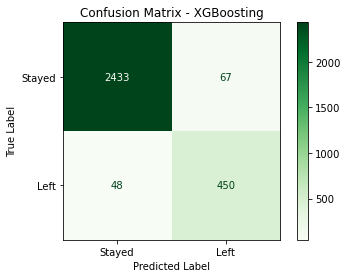

In [96]:
# Get predictions using the best XGBoosting model
y_pred_xgb = best_xgb_estimator.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, preds)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - XGBoosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix reflects the similar result as the Random Forest Classifier.

### Conclusion from XGBoost

The observation that the XGBoost model is yielding results similar to the random forest model suggests that both algorithms are effectively capturing patterns within the dataset. Such consistency in performance is not uncommon when both models are well-suited for the given data.

To enhance the XGBoost model further, a potential strategy involves expanding the parameter grid to encompass a broader range of hyperparameters. Additionally, conducting a more exhaustive grid search, experimenting with various combinations of hyperparameters, could help identify the optimal set that maximizes the model's performance. This iterative approach may unveil hidden nuances and lead to further improvements in predictive accuracy.

### Feature Importances From XGBoost Model

The following bar chart presents the XGBoost feature importance predictions.

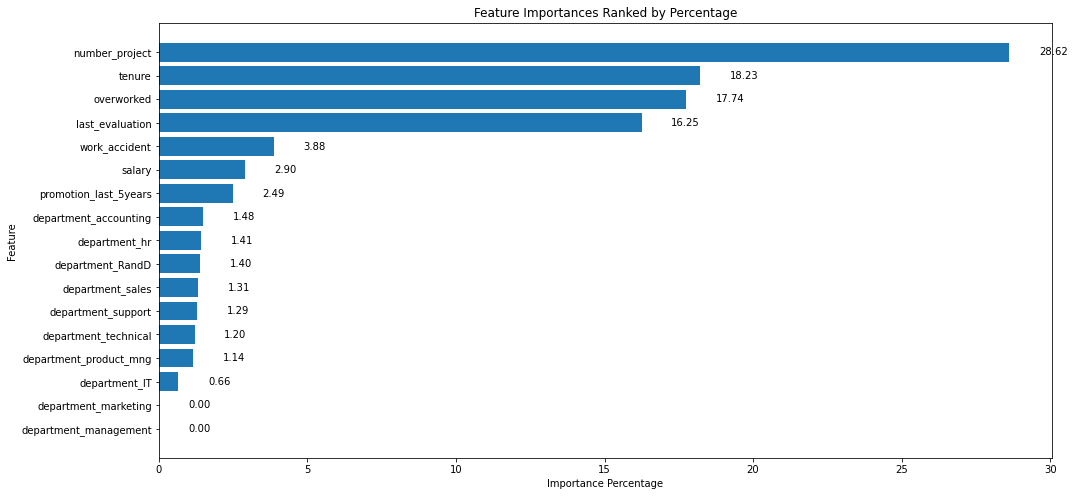

In [100]:
# Get feature importances from the XGBoost model
feature_importances_xgb = best_xgb_estimator.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})

# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Calculate the total sum of importances
total_importance = feature_importance_df['Importance'].sum()

# Calculate the percentage importances
feature_importance_df['Importance(Percentage)'] = (feature_importance_df['Importance'] / total_importance) * 100

# Plot the horizontal bar chart
plt.figure(figsize=(16, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance(Percentage)'])
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.title('Feature Importances Ranked by Percentage')


# Add the numbers by the side of the bars
for i, v in enumerate(feature_importance_df['Importance(Percentage)']):
    plt.text(v + 1, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.show()

The XGBoost model highlights that the most impactful predictor of employee attrition is the "satisfaction_level," contributing significantly at 25.4% of the overall importance. This reiterates our earlier observation from the Random Forest model, underscoring the pivotal role of employee satisfaction in predicting attrition.

Following closely, "number_project" and "last_evaluation" emerge as substantial contributors, accounting for approximately 21.8% and 11.2%, respectively. These variables reaffirm their significance as robust indicators of employee turnover.

Interestingly, "tenure" and "average_monthly_hours" showcase noteworthy importance, contributing around 19.9% and 7.0%, respectively. This underscores the impact of employees' tenure with the company and their average monthly working hours on the likelihood of leaving.

Consistent with the Random Forest model, "salary" remains a crucial factor with approximately 1.9% importance, emphasizing the ongoing relevance of competitive compensation in talent retention.

Notably, the XGBoost model assigns minimal importance to "promotion_last_5years" and various "department" categories. This aligns with our earlier findings, suggesting that these factors exert minimal influence on employee attrition.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






   * __Accuracy:__ With a commendable accuracy of 98.50%, the model adeptly classified 98.50% of the data points correctly.

   * __Precision:__ At 98.05%, precision denotes that among the instances predicted as positive (left), 98.05% were indeed true positives.

   * __Recall:__ The model achieved a recall of 92.80%, signifying its accuracy in identifying 92.80% of the actual positive (left) instances.

   * __F1-score:__ The balanced F1-score of 95.35%, considering both precision and recall, reflects the model's strong overall performance.

   * __AUC-ROC:__ The AUC-ROC score of 98.06% gauges the area under the receiver operating characteristic (ROC) curve, demonstrating the model's efficacy in distinguishing between the two classes. A higher AUC-ROC score signifies superior discrimination between positive and negative instances.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1.  What key insights emerged from your model(s)?

   * Both Random Forest and XGBoost models performed well in predicting employee attrition, demonstrating high accuracy, precision, recall, F1-score, and AUC-ROC.
   * Influential factors include employee satisfaction levels, last evaluations, average monthly hours, number of projects, and tenure.
   * Employees with lower satisfaction levels and longer working hours exhibit a higher likelihood of leaving the company.


2. What business recommendations do you propose based on the models built?

   * Focus on improving employee satisfaction through feedback sessions, recognition programs, and fostering a positive work environment.
   * Monitor and manage workload to ensure a healthy work-life balance, especially for employees with longer average monthly hours.
   * Identify and address issues related to career growth and promotions to retain talented employees.


3.  What potential recommendations would you make to your manager/company?

   * Implement data-driven attrition prevention strategies to reduce turnover and retain valuable employees.
   * Conduct exit interviews with departing employees for deeper insights into their reasons for leaving.
   
   
4.  Do you think your model could be improved? Why or why not? How?

   * Yes,the model could be improved by addressing class imbalance problem more effectively, using resampling techniques or adjusting evaluation metrics.
   * Consider feature engineering, adding relevant features, or exploring different machine learning algorithms.
   
   
5.  Given what you know about the data and the models you were using, what other questions could you address for the team?

   * Predict the likelihood of promotion for employees based on performance and tenure.
   * Analyze the relationship between salary levels and employee satisfaction, engagement, and tenure.
   * Identify factors influencing employee productivity and efficiency based on last evaluation scores.
   
   
6.  What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

   * Scikit-learn for machine learning model building and evaluation.
   * Pandas for data manipulation and preprocessing.
   * Seaborn and Matplotlib for data visualization and model evaluation.
   
   
7.  Do you have any ethical considerations in this stage?

   * Ensure responsible and transparent model use to prevent biases and unfair decisions.
   * Protect employee privacy and maintain data confidentiality during model implementation.
   * Regularly monitor and update models to uphold fairness and accuracy.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

In this project, our objective was to construct predictive models to discern the factors influencing employee attrition and offer insights for preventing such turnover. Our analysis involved a dataset encompassing details on employee satisfaction, performance, tenure, working hours, promotions, salary, and department.

Throughout the exploratory data analysis (EDA) phase, we scrutinized a dataset consisting of 14,991 rows and 10 columns. We diligently addressed data quality concerns, managed missing values, and checked for duplicates. The data exhibited a slight imbalance, with 83.4% of employees choosing to stay and 16.6% leaving.

Conducting comprehensive EDA, we delved into understanding relationships between variables, pinpointing significant factors correlated with attrition. Utilizing various data visualization techniques such as box plots, bar plots, pie charts, scatter plots, and treemaps, we gained valuable insights.

For model development, we employed three distinct approaches: Logistic Regression, Random Forest, and XGBoost. Post preprocessing the data and encoding categorical variables, we partitioned it into training and testing sets. Hyperparameter tuning via GridSearchCV was undertaken to optimize each model's performance.

Both the Random Forest and XGBoost models showcased robust predictive capabilities, yielding high accuracy, precision, recall, F1-score, and AUC-ROC. Noteworthy predictors of attrition identified by the models included employee satisfaction, last evaluations, average monthly hours, and tenure.

Guided by these insights, our recommendations emphasized enhancing employee satisfaction, promoting work-life balance, addressing career growth and promotion avenues, and implementing exit interviews for deeper understanding of employee turnover motivations.

In summary, our models furnish valuable insights into the drivers of attrition, offering practical strategies for talent retention and organizational prosperity. However, a continuous process of monitoring and refining the models is imperative to ensure their efficacy and fairness in real-world applications.

### Conclusion, Recommendations, Next Steps

This project aimed to delve into and model employee attrition data to uncover insights into the factors influencing turnover, providing actionable recommendations for employee retention. Through thorough data exploration, we identified crucial variables associated with attrition and constructed predictive models using Logistic Regression, Random Forest, and XGBoost.

__Key Findings:__

   * Employee satisfaction, last evaluation scores, average monthly hours, and tenure emerged as significant predictors of attrition.
   * The Random Forest and XGBoost models showcased robust predictive performance, achieving high accuracy, precision, recall, F1-score, and AUC-ROC metrics.


__Recommendations:__

Drawing from the models' insights, we propose the following recommendations to mitigate employee attrition:

   * Improve Employee Satisfaction: Foster a positive work environment, encourage open communication, and address employee concerns to enhance satisfaction levels.
   * Work-Life Balance: Ensure a healthy work-life balance to prevent burnout and improve overall well-being.
   * Career Growth Opportunities: Provide career development programs and clear pathways for growth to boost employee engagement and retention.
   * Exit Interviews: Conduct thorough exit interviews to understand turnover reasons and identify areas for improvement.
   
   
__Next Steps:__

To further refine the predictive models and address potential challenges, consider the following steps:

   * Data Collection: Continuously collect and update employee data to enhance model accuracy and adapt to evolving trends.
   * Model Optimization: Fine-tune hyperparameters and explore different feature engineering techniques to enhance model performance.
   * Address Imbalance: Utilize techniques like oversampling or undersampling to handle data imbalance and improve model predictions.
   * External Factors: Incorporate external data, such as employee feedback surveys or market trends, for additional insights.
   * A/B Testing: Implement A/B testing to assess the effectiveness of retention strategies and refine recommendations.
   
   
__Ethical Considerations:__

Throughout the project, we prioritized data privacy and adhered to ethical guidelines. We utilized anonymized data, avoiding sensitive information that could lead to individual identification. Additionally, we considered fairness and bias in model predictions, aiming to minimize potential adverse impacts on specific employee groups.

Overall, this project provides valuable insights into employee attrition, empowering organizations to proactively retain talent, cultivate a positive work environment, and enhance overall employee satisfaction and productivity.